In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ancient-yi-images-ab/lake_a.png
/kaggle/input/ancient-yi-images-ab/hot_a.png
/kaggle/input/ancient-yi-images-ab/full_b.png
/kaggle/input/ancient-yi-images-ab/gut_b.png
/kaggle/input/ancient-yi-images-ab/gut_a.png
/kaggle/input/ancient-yi-images-ab/lake_b.png
/kaggle/input/ancient-yi-images-ab/hot_b.png
/kaggle/input/ancient-yi-images-ab/garden_b.png
/kaggle/input/ancient-yi-images-ab/garden_a.png
/kaggle/input/ancient-yi-images-ab/full_a.png


## Introduction to Ancient Yi Characters and Project goals

The Nuosu Yi, also known as Sichuan Yi, are an ethnic minority group primarily residing in the southwestern regions of China, including Sichuan, Yunnan, and Guizhou provinces. As one of the largest Yi subgroups, they have preserved a rich cultural heritage, including their own unique writing system, which traces its roots back thousands of years. This system is composed of hieroglyphic characters, each representing a distinct meaning or sound.

The ancient Yi writing system, often referred to as "Classical Yi," was historically used for recording religious texts, historical events, and daily activities. This intricate system consisted of over 20,000 distinct characters, making it one of the most complex writing systems in the world. Each character, due to its heiroglyphic nature, was not only a linguistic unit but also a reflection of the Yi people's worldview, culture, and way of life.

Today, the Yi language has undergone significant standardization and simplification, resulting in a modern version that is more accessible and practical for contemporary use. This standardized writing system, introduced in the 1970s, consists of 819 characters, significantly reducing the complexity of the original script. Despite these changes, the ancient Yi characters remain a vital area of study for linguists, historians, and anthropologists, offering insights into the evolution of language and the cultural identity of the Yi people.

In recent years, however, interest in such studies has been declining. This project seeks to explore the potential for identifying variant forms of the same ancient Yi characters, specifically those extracted from the script Zhi Lujing, a traditional ritual mantra manuscript used to guide the deceased to paradise. By examining these characters, this project aims to contribute to the preservation and deeper understanding of this unique cultural and linguistic heritage.

To learn more about the Yi writing system, visit https://www.omniglot.com/writing/yi.htm


## Intorudction to few shot learning 

Few-shot learning is a machine learning paradigm designed to train models with only a few examples per category. The primary objective is to "learn to learn," enabling models to understand the similarities and differences between objects without directly categorizing them. Instead of relying on extensive labeled datasets, few-shot learning emphasizes generalization from minimal data.

In this approach, the training set is referred to as the "support set," a term commonly used in meta-learning. Meta-learning focuses on teaching models how to learn effectively from small datasets. Few-shot learning setups are often defined by two key parameters:

- K-way: The number of categories in the support set.
- N-shot: The number of examples (samples) per category.
Model performance in few-shot learning typically follows these trends:

- Higher ways (more categories) lead to lower accuracy due to increased complexity.
- Higher shots (more examples per category) result in higher accuracy as the model gains more information to learn from.

To build on my passion for both machine learning and my cultural heritage, I decided to use the Siamese network—to identify “variant characters” in the ancient Nuosu Yi hieroglyph language. Variant characters are visually different representations of the same meaning, often derived from a common root character.

### Dataset

pngs with five different charaters, with the meaning "full", "garden", "gut", "hot", and "lake", and their corresponding variant characters with the same meaning. 


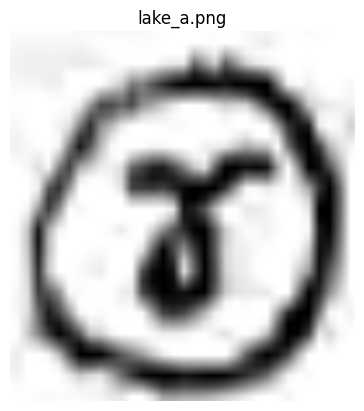

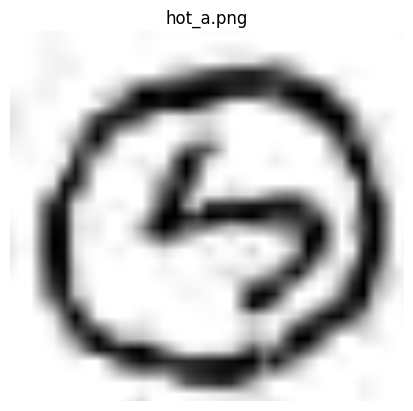

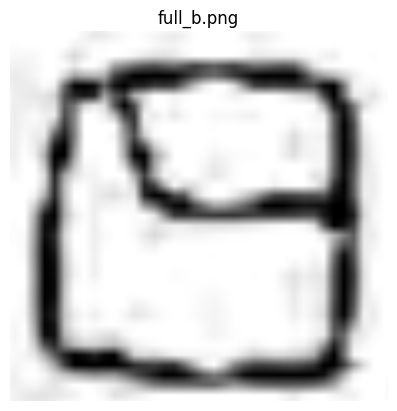

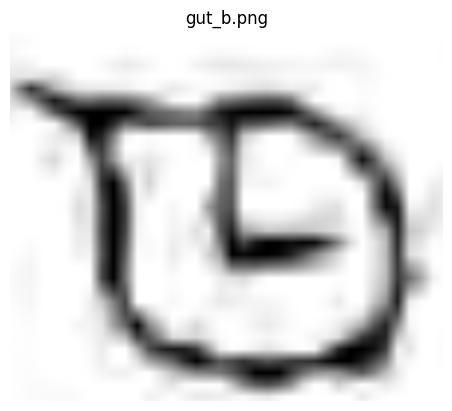

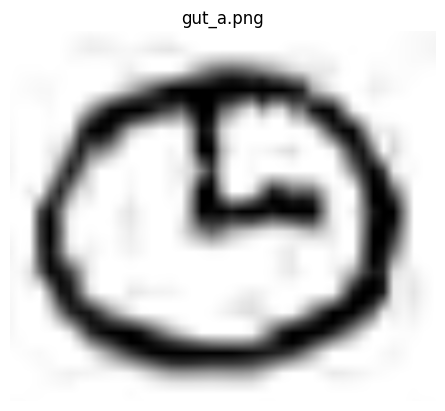

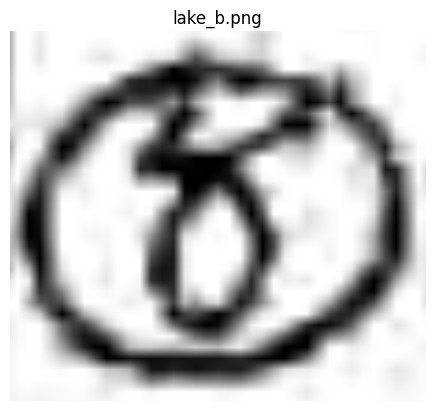

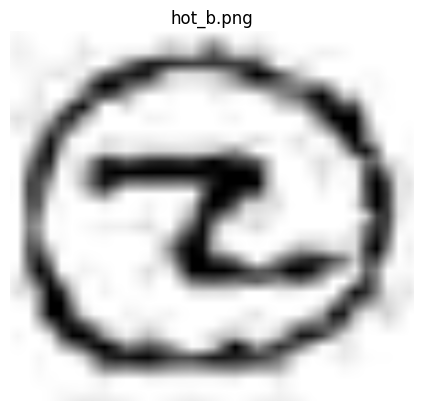

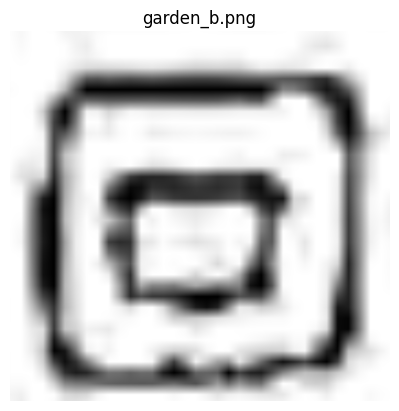

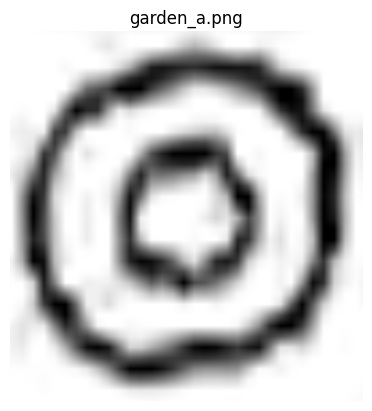

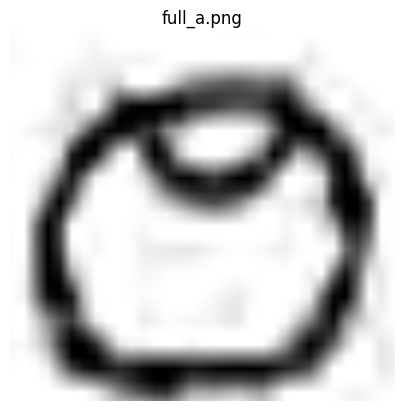

In [52]:
# original datasets
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Directory containing the images
image_dir = '/kaggle/input/ancient-yi-images-ab'

# List all files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Display each image
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    
    # Display the image
    plt.figure()
    plt.imshow(img, cmap='gray')  # Use 'gray' if the images are grayscale
    plt.title(image_file)
    plt.axis('off')  # Hide axes
    plt.show()


## Preprocessing Data: Binarification of Images

The purpose of binarization is to simplify images by converting them into two pixel values (black and white), to make key features like shapes, edges, or text more prominent for analysis.

In [53]:

# def process_image(input_path, output_path):
#     # Open the image
#     img = Image.open(input_path)
    
#     # Convert to grayscale
#     img = img.convert('L')
    
#     # Resize to 28x28
#     img = img.resize((28, 28), Image.ANTIALIAS)
    
#     # Invert colors
#     img = ImageOps.invert(img)
    
#     # Save the processed image
#     img.save(output_path)

def process_image(input_path, output_path):
    # Open the image
    img = Image.open(input_path)
    
    # Convert to grayscale
    img = img.convert('L')
    
    # Resize to 28x28
    img = img.resize((28, 28), Image.ANTIALIAS)
    
    # Invert colors
    img = ImageOps.invert(img)
    
    # Apply binarization
    threshold = 128  # You can adjust this threshold
    img = img.point(lambda p: 255 if p > threshold else 0)
    
    # Save the processed image
    img.save(output_path)

# Directory containing PNG images
input_dir = '/kaggle/input/ancient-yi-images-ab'
output_dir = '/kaggle/working/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each image in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        process_image(input_path, output_path)

print("Image processing complete.")

/tmp/ipykernel_34/796008424.py:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)


Image processing complete.


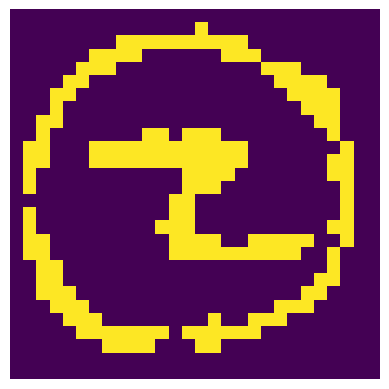

In [54]:
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/kaggle/working/hot_b.png'

# Open the image
yi_image = Image.open(image_path)

# Display the image
plt.imshow(yi_image)
plt.axis('off')  # Hide axes
plt.show()

In [55]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [56]:
%matplotlib inline
from sklearn.datasets import load_digits
import cv2
from keras import backend as K
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten,Activation
from keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt 
from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.models import load_model, model_from_json
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Input, Lambda, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model
from tensorflow.keras import backend as K

#enable eager execution in tensorflow
tf.config.run_functions_eagerly(True)

### Siamese Network Construction

The Siamese network is a specialized neural network architecture designed for few-shot learning, where the goal is to generalize well from a limited number of examples. Unlike traditional classification models that predict specific categories, Siamese networks are trained to learn similarities and differences between pairs of inputs. This makes them particularly useful for tasks where the dataset is small, diverse, or lacks comprehensive labels.

A Siamese network processes pairs of inputs by passing them through a shared network to extract feature embeddings. It measures similarity using a distance metric where smaller distances indicate higher similarity. During training, the network learns to compare embeddings using contrastive loss, which pulls similar embeddings closer and pushes dissimilar ones apart.


In [57]:

# Enable eager execution in TensorFlow
tf.config.run_functions_eagerly(True)

# Define the euclidean_distance function
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def compute_accuracy(predictions, labels):
    return labels[predictions.ravel() < 0.5].mean()

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

# Define your input tensors
img_a = Input(shape=(28, 28, 1))
img_b = Input(shape=(28, 28, 1))

# Example shared model (e.g., CNN)
shared_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5)
])

# Generate feature vectors
encoded_a = shared_model(img_a)
encoded_b = shared_model(img_b)

# Compute the distance
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([encoded_a, encoded_b])

# Define the model
model = Model(inputs=[img_a, img_b], outputs=distance)

# Compile the model
rms = RMSprop(learning_rate=0.001)
model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])

# Print model summary
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 128)       │  1,385,216 │ input_layer_12[0… │
│ (Sequential)        │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 1)         │          0 │ sequential_4[0][… │
│                     │                   │            │ sequential_4[1][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,385,216 (5.28 MB)

 Trainable params: 1,385,216 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Directory containing the images
input_dir = '/kaggle/working/'

# Lists to store grouped filenames
a_images = []
b_images = []

# Iterate over the files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith('_a.png'):
        a_images.append(os.path.join(input_dir, filename))  # Add full path if needed
    elif filename.endswith('_b.png'):
        b_images.append(os.path.join(input_dir, filename))  # Add full path if needed

# Print the grouped filenames
print("Batch A Images:")
print(a_images)
print("\nBatch B Images:")
print(b_images)

Batch A Images:
['/kaggle/working/garden_a.png', '/kaggle/working/hot_a.png', '/kaggle/working/lake_a.png', '/kaggle/working/full_a.png', '/kaggle/working/gut_a.png']

Batch B Images:
['/kaggle/working/hot_b.png', '/kaggle/working/garden_b.png', '/kaggle/working/full_b.png', '/kaggle/working/gut_b.png', '/kaggle/working/lake_b.png']


In [59]:
def preprocess_image(image_path):
    """Preprocess a single image file."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28
    img = ImageOps.invert(img)  # Invert colors (if required by your preprocessing)
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img = img.reshape(28, 28, 1)  # Add channel dimension
    return img

# Load and preprocess all images in batches
# a_images_array = np.array([preprocess_image(img) for img in a_images])
# b_images_array = np.array([preprocess_image(img) for img in b_images])
a_images_array = np.array([preprocess_image(img) for img in a_images])
b_images_array = np.array([preprocess_image(img) for img in b_images])

/tmp/ipykernel_34/1604792782.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28


In [60]:
from itertools import product
# Pair every `_a` with every `_b`
pairs = list(product(range(len(a_images_array)), range(len(b_images_array))))

# Initialize threshold
threshold = 0.5
similar_pairs = []

# Calculate similarity for each pair
for idx_a, idx_b in pairs:
    img_a = a_images_array[idx_a].reshape(1, 28, 28, 1)  # Reshape for model input
    img_b = b_images_array[idx_b].reshape(1, 28, 28, 1)
    distance = model.predict([img_a, img_b])[0][0]  # Predict similarity score
    
    # Check similarity threshold
    if distance < threshold:
        similar_pairs.append((a_images[idx_a], b_images[idx_b], distance))

# Output all similar pairs
print("Pairs with similarity score below threshold:")
for pair in similar_pairs:
    print(f"Image A: {pair[0]}, Image B: {pair[1]}, Similarity Score: {pair[2]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Pairs with similarity score below threshold:


### Interpretation of the Binarized Images
As the results show, the only similarity detected is between the character pair lake_a and garden_b, as illustrated in the image below. These poor results could be attributed to the effects of binarization.

Binarization offers certain advantages, such as:

1. Simplifying the data for tasks where only the presence or absence of features matters.
2. Reducing computational complexity for some models.
However, it also has the significant disadvantage of the potential loss of important details in images with subtle variations in intensity.

In this case, where the dataset is limited, binarization may not be the most appropriate approach. Therefore, I am going to reattempt the analysis using the non-binarized, original dataset.



In [61]:
orig_input_dir = '/kaggle/input/ancient-yi-images-ab'

# Lists to store grouped filenames
a_images = []
b_images = []

# Iterate over the files in the directory
for filename in os.listdir(orig_input_dir):
    if filename.endswith('_a.png'):
        a_images.append(os.path.join(orig_input_dir, filename))  # Add full path if needed
    elif filename.endswith('_b.png'):
        b_images.append(os.path.join(orig_input_dir, filename))  # Add full path if needed

# Print the grouped filenames
print("Batch A Images:")
print(a_images)
print("\nBatch B Images:")
print(b_images)

Batch A Images:
['/kaggle/input/ancient-yi-images-ab/lake_a.png', '/kaggle/input/ancient-yi-images-ab/hot_a.png', '/kaggle/input/ancient-yi-images-ab/gut_a.png', '/kaggle/input/ancient-yi-images-ab/garden_a.png', '/kaggle/input/ancient-yi-images-ab/full_a.png']

Batch B Images:
['/kaggle/input/ancient-yi-images-ab/full_b.png', '/kaggle/input/ancient-yi-images-ab/gut_b.png', '/kaggle/input/ancient-yi-images-ab/lake_b.png', '/kaggle/input/ancient-yi-images-ab/hot_b.png', '/kaggle/input/ancient-yi-images-ab/garden_b.png']


In [62]:
a_images_array = np.array([preprocess_image(img) for img in a_images])
b_images_array = np.array([preprocess_image(img) for img in b_images])

/tmp/ipykernel_34/1604792782.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)  # Resize to 28x28


In [63]:
# Pair every `_a` with every `_b`
pairs = list(product(range(len(a_images_array)), range(len(b_images_array))))

# Initialize threshold
threshold = 0.5
similar_pairs = []

# Calculate similarity for each pair
for idx_a, idx_b in pairs:
    img_a = a_images_array[idx_a].reshape(1, 28, 28, 1)  # Reshape for model input
    img_b = b_images_array[idx_b].reshape(1, 28, 28, 1)
    distance = model.predict([img_a, img_b])[0][0]  # Predict similarity score
    
    # Check similarity threshold
    if distance < threshold:
        similar_pairs.append((a_images[idx_a], b_images[idx_b], distance))

# Output all similar pairs
print("Pairs with similarity score below threshold:")
for pair in similar_pairs:
    print(f"Image A: {pair[0]}, Image B: {pair[1]}, Similarity Score: {pair[2]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Pairs with similarity score below threshold:
Image

### Interpretation of the Original Image Dataset

As expected, more characters were identified as matching characters from different categories. This suggests that the model is taking into account finer granularities of each character's features. However, the results are still not optimal, as many characters are incorrectly paired. This could be due to the limitations of the model or the lack of pairs of characters. Most importantly, a lot of the characters in the dataset, despite having different meanings, look very similar (a lot of circles and squares), which may contribute to the mispairings.